## Import libraries

In [1]:
import pandas as pd
import seaborn as sns

## Import Datasets

In [2]:
df=pd.read_csv("netflix.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Shape and Size of the dataset

print(f'Shape: {df.shape}')
print(f'Size: {df.size}')

Shape: (7787, 12)
Size: 93444


In [4]:
# Data types of each column
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# Drop 'release_year' column
df.drop('release_year',axis=1,inplace=True)

# Rename columns for better readability
df.columns=['ShowID','Category','Title','Director','Cast','Country','Release_Date','Rating','Duration','Type','Description']

In [8]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


## Check Duplicate Record

In [9]:
df[df.duplicated()]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


## Drop Duplicate Records

In [10]:
df.drop_duplicates(inplace=True)

## Check null values

In [11]:
df.isnull().sum()

ShowID             0
Category           0
Title              0
Director        2389
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

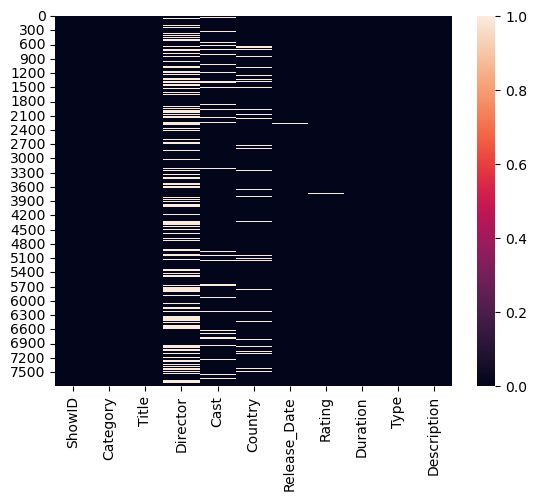

In [12]:
# Heatmap to visualize null values
sns.heatmap(df.isnull())

## 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [13]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [14]:
df[df.Title=='House of Cards']

#df[df.Title.isin(['House of Cards'])]
#df[df.Title.str.contains('House of Cards')]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


## 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [15]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [16]:
df.dtypes

ShowID          object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [17]:
# Convert 'Release_Date' column to datetime format
df['Release_Date']=pd.to_datetime(df['Release_Date'],errors='coerce')

In [18]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [19]:
df.dtypes

ShowID                  object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date    datetime64[ns]
Rating                  object
Duration                object
Type                    object
Description             object
dtype: object

In [20]:
# Extract year from 'Release_Date' and count the occurrences of each year
df['Release_Date'].dt.year.value_counts()

Release_Date
2019.0    2136
2020.0    2008
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
2015.0      79
2014.0      24
2011.0      13
2013.0      10
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

<Axes: xlabel='Release_Date'>

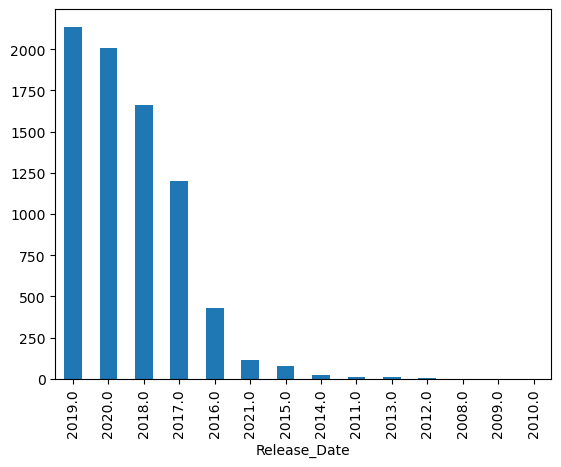

In [21]:
# Bar graph for the count of Movies and TV Shows
df['Release_Date'].dt.year.value_counts().plot(kind='bar')

## 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

In [22]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [23]:
# Count of Movies and TV Shows

# using .groupby()
# df.groupby('Category').Category.count()

# using .value_counts()
df.Category.value_counts()

Category
Movie      5377
TV Show    2410
Name: count, dtype: int64

<Axes: xlabel='Category'>

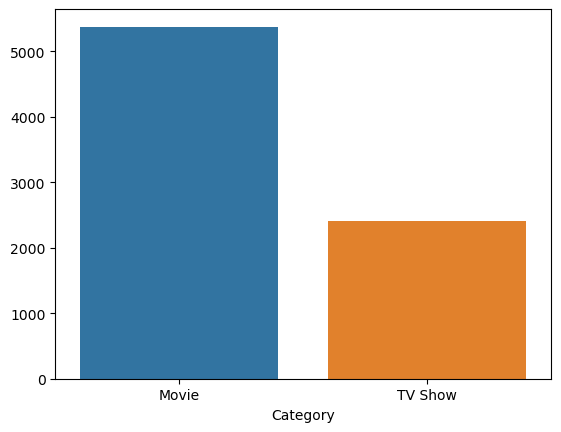

In [24]:
### using pandas bar graph
# df.Category.value_counts().plot(kind='bar')

### using seaborn bar graph
sns.barplot(x=df.Category.value_counts().index,y=df.Category.value_counts().values)

## 4) Show all the Movies that were released in year 2012.

In [25]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [26]:
df[(df.Category=='Movie')&(df.Release_Date.dt.year==2012)]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
818,s819,Movie,Being Elmo: A Puppeteer's Journey,Constance Marks,"Kevin Clash, Whoopi Goldberg",United States,2012-02-21,PG,76 min,Documentaries,Whoopi Goldberg narrates Elmo creator Kevin Cl...
1229,s1230,Movie,Casa de mi Padre,Matt Piedmont,"Will Ferrell, Gael García Bernal, Diego Luna, ...","United States, Mexico",2012-11-14,R,84 min,Comedies,Will Ferrell stars as a Spanish-speaking cowbo...
3466,s3467,Movie,Kung Fu Panda: Holiday,Tim Johnson,"Jack Black, Angelina Jolie, Dustin Hoffman, Ja...",United States,2012-12-01,TV-PG,26 min,"Children & Family Movies, Comedies","As preparations for the Winter Feast build, Po..."


## 5) Show only the Titles of all TV Shows that were released in India only.

In [27]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [28]:
df[(df.Category=='TV Show')&(df.Country=='India')].Title

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6248                  The Creative Indians
6398    The Golden Years with Javed Akhtar
6467                The House That Made Me
7292                            Typewriter
7703                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

## 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [29]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [30]:
df.Director.value_counts().head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: count, dtype: int64

## 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [31]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [32]:
df[((df.Category=='Movie')&(df.Type=='Comedies'))|(df.Country=='United Kingdom')]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist..."
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...
...,...,...,...,...,...,...,...,...,...,...,...
7668,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...
7669,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."
7686,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."
7723,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...


##  8) In how many movies/shows, Tom Cruise was cast ?

In [33]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [34]:
# Shape of the original DataFrame
df.shape

(7787, 11)

In [35]:
# Create df1 by dropping rows with null values in the 'Cast' column
df1=df.dropna(subset=['Cast'],axis=0)

In [36]:
# Shape of the new DataFrame (df1)
df1.shape

(7069, 11)

In [37]:
df1[df1.Cast.str.contains('Tom Cruise')]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5070,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


## 9) What are the different Ratings defined by Netflix ?

In [38]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [39]:
df.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

## 9.1) How many Movies got the 'TV-14' rating, in Canada ?

In [40]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [41]:
df[(df.Category=='Movie')&(df.Rating=='TV-14')&(df.Country=='Canada')].shape[0]

11

## 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

In [42]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [43]:
df[(df.Category=='TV Show')&(df.Rating=='R')&(df.Release_Date.dt.year>2018)].shape[0]

1

## 10) What is the maximum duration of a Movie/Show on Netflix ?

In [44]:
df.head(2)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [45]:
# Split 'Duration' column into 'Duration_N' (numeric part) and 'Duration_Unit' (unit part)
df[['Duration_N','Duration_Unit']]=df.Duration.str.split(' ',expand=True)

df.head(2)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min


In [46]:
# Check data type of the 'Duration_N' column
df.Duration_N.dtypes

dtype('O')

In [47]:
# Convert the 'Duration_N' column to integer data type
df.Duration_N=df.Duration_N.astype(int)

# Unique values in the 'Category' column
df.Category.unique()

array(['TV Show', 'Movie'], dtype=object)

In [48]:
# Create separate DataFrames for TV Shows and Movies
tvshow=df.groupby('Category').get_group('TV Show')
movie=df.groupby('Category').get_group('Movie')

# Maximum duration values for Movies and TV Shows
print('Max Duration for Movie: ',movie[['Duration_N','Duration_Unit']].max().values,
      '\nMax Season for TV Show: ',tvshow[['Duration_N','Duration_Unit']].max().values)

Max Duration for Movie:  [312 'min'] 
Max Season for TV Show:  [16 'Seasons']


## 11) Which individual country has the Highest No. of TV Shows ?

In [49]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons


In [50]:
df[(df.Category=='TV Show')].Country.value_counts().head(1)

Country
United States    705
Name: count, dtype: int64

## 12) How can we sort the dataset by Year ?

In [51]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons


In [52]:
df.sort_values(by='Release_Date',ascending=False)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
5059,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,2021-01-16,TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...,103,min
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",108,min
1673,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand",2021-01-16,R,94 min,Horror Movies,"With no memory of the previous night, a vacati...",94,min
7569,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,2021-01-15,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali...",32,min
6634,s6635,TV Show,The Magicians,NaN,"Jason Ralph, Arjun Gupta, Hale Appleman, Stell...","United States, Canada",2021-01-15,TV-MA,5 Seasons,"TV Dramas, TV Sci-Fi & Fantasy",When grad student Quentin Coldwater enters a c...,5,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6950,s6951,TV Show,The Tudors,NaN,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",NaT,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...,4,Seasons
6996,s6997,TV Show,The West Wing,NaN,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,NaT,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...,7,Seasons
7446,s7447,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,NaT,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ...",3,Seasons
7522,s7523,TV Show,Weird Wonders of the World,NaN,Chris Packham,United Kingdom,NaT,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...,2,Seasons


## 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [53]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons


In [54]:
df[((df.Category=='Movie')&(df.Type=='Dramas'))|((df.Category=='TV Show')&(df.Type=="Kids' TV"))]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,119,min
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2,Seasons
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,110,min
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",95,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",2017-06-16,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2,Seasons
7715,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",1,Season
7717,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",1,Season
7756,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2,Seasons


## Author

[Alok Ranjan](https://www.linkedin.com/in/alokranjan-in/)